In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

df_train= pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
sub_data = pd.read_csv("gender_submission.csv")

def impute_age(df, col1, col2, col3):
    '''This is an age imputer. This fills in the missing values in the age columns based on he cabin and sex'''
    new_ages = []
    for ix, vals in df[[col1, col2, col3]].iterrows():
        if pd.isnull(vals[col1]):
            if df[col2].iloc[ix] == 'male' and df[col3].iloc[ix] == 'S':
                new_ages.append(30.0)
            elif df[col2].iloc[ix] == 'male' and df[col3].iloc[ix] == 'Q':
                new_ages.append(31.0)
            elif df[col2].iloc[ix] == 'male' and df[col3].iloc[ix] == 'C':
                new_ages.append(33.0)
            elif df[col2].iloc[ix] == 'female' and df[col3].iloc[ix] == 'S':
                new_ages.append(28.0)
            elif df[col2].iloc[ix] == 'female' and df[col3].iloc[ix] == 'Q':
                new_ages.append(24.0)
            elif df[col2].iloc[ix] == 'female' and df[col3].iloc[ix] == 'C':
                new_ages.append(28.0)            
        else:
            new_ages.append(vals[col1])
            
    return new_ages

In [3]:
print(df_train.shape)
print(df_test.shape)
print(sub_data.shape)


(891, 12)
(418, 11)
(418, 2)


In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


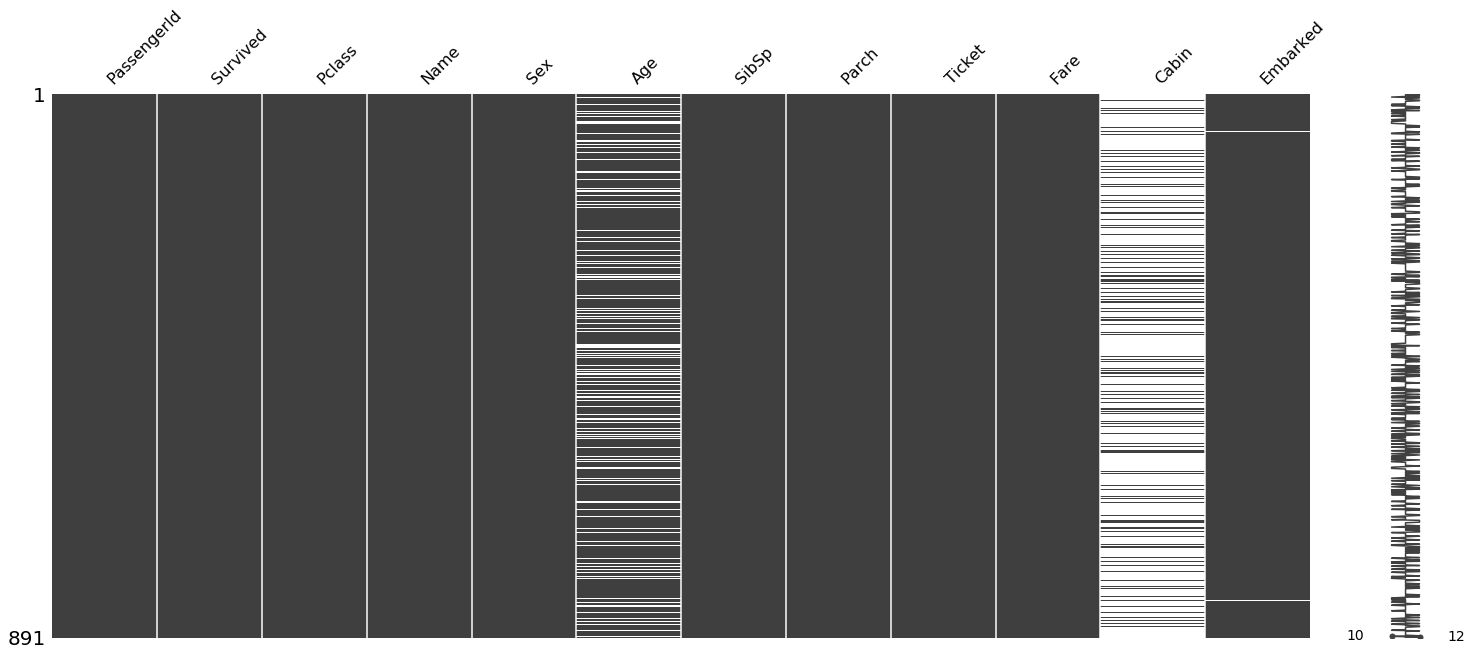

In [5]:
msno.matrix(df_train)

In [6]:
df_train.drop(labels = ['PassengerId', 'Cabin'], axis = 1, inplace = True)
df_train['Name_title'] = df_train['Name'].apply(lambda x: x.split()[1])
df_train['Embarked'].fillna(value = df_train['Embarked'].mode()[0], inplace=True)
round(df_train.groupby(['Sex', 'Embarked'])['Age'].mean())
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.


In [7]:
df_train['Name_title'].value_counts()

Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Impe,             3
Planke,           3
Gordon,           2
Major.            2
Mlle.             2
Col.              2
Ms.               1
Velde,            1
Shawah,           1
the               1
Don.              1
Billiard,         1
Pelsmaeker,       1
Melkebeke,        1
Capt.             1
Carlo,            1
Messemaeker,      1
Cruyssen,         1
Walle,            1
Steen,            1
Mme.              1
Jonkheer.         1
der               1
Mulder,           1
Name: Name_title, dtype: int64

In [8]:
name_titles = df_train.groupby('Name_title')['Name_title'].count().sort_values(ascending = False)[0:4].keys()
df_train['Name_title'] = df_train['Name_title'].apply(lambda x: x if x in name_titles else "Other")

In [9]:
df_train['Name_title'].value_counts()

Mr.        502
Miss.      179
Mrs.       121
Other       49
Master.     40
Name: Name_title, dtype: int64

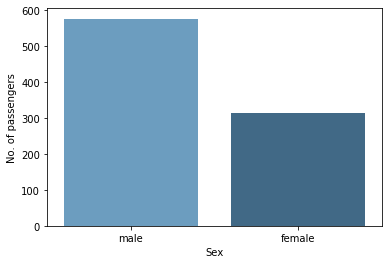

In [10]:
plot1 = sns.countplot(x='Sex', data = df_train, palette="Blues_d")
plot1.set_ylabel("No. of passengers")
plt.show()

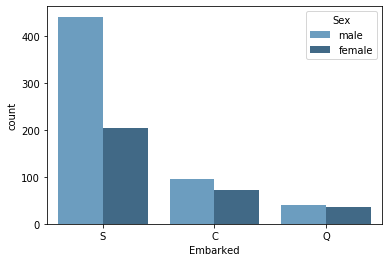

In [11]:
sns.countplot(x='Embarked', data= df_train, hue = 'Sex', palette="Blues_d")
plt.show()

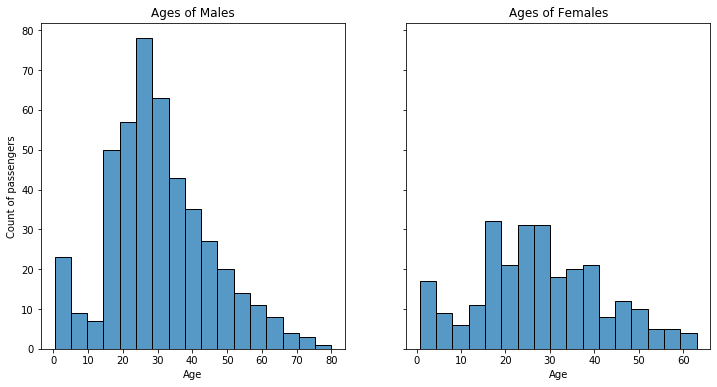

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, sharey= True, figsize=(12, 6))
sns.histplot(x=df_train[df_train['Sex'] == 'male']['Age'], 
             data=df_train, ax=axes[0])
sns.histplot(x=df_train[df_train['Sex'] == 'female']['Age'], 
             data=df_train, ax=axes[1], bins = 17)
axes[0].set_title("Ages of Males")
axes[1].set_title("Ages of Females")
axes[0].set_ylabel("Count of passengers")
plt.show()

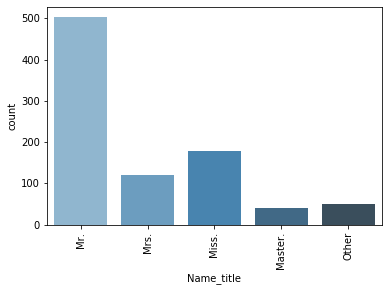

In [13]:
sns.countplot(x="Name_title", data=df_train, palette="Blues_d")
plt.xticks(rotation=90)
plt.show()

[]

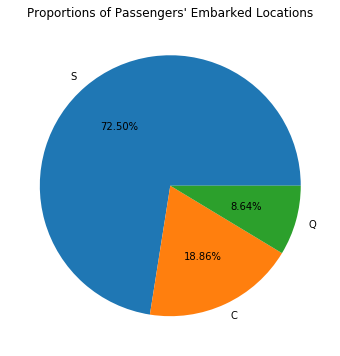

In [14]:
wedges = df_train['Embarked'].value_counts().keys()
sizes = df_train['Embarked'].value_counts().values
fig = plt.figure(figsize = (6, 6))
plt.pie(sizes, labels = wedges, autopct='%1.2f%%')
plt.title("Proportions of Passengers' Embarked Locations")
plt.plot()



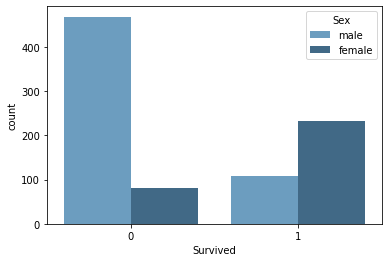

In [15]:
sns.countplot(x='Survived', data= df_train, hue='Sex',palette="Blues_d")

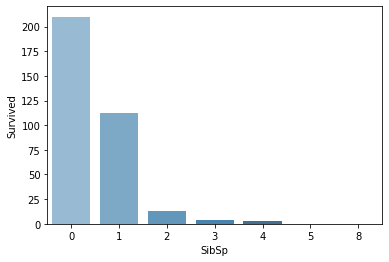

In [16]:
sns.barplot(x='SibSp',y='Survived', data=df_train, estimator=sum, ci=False, palette="Blues_d")
plt.show()

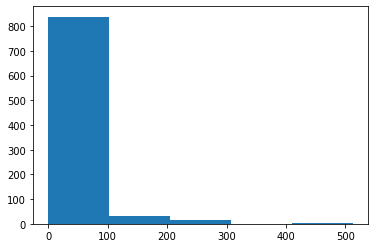

In [17]:
plt.hist(df_train['Fare'], bins=5)
plt.show()

In [18]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.


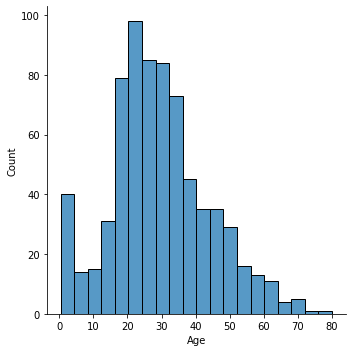

In [19]:
sns.displot(x="Age", data=df_train)
plt.show()

In [20]:
sampled_ages = df_train["Age"].dropna().sample(df_train['Age'].isna().sum(), random_state=0).values
missing_vals = df_train["Age"][df_train['Age'].isna()].values
df_train["Age"] = df_train["Age"].replace(missing_vals, sampled_ages)

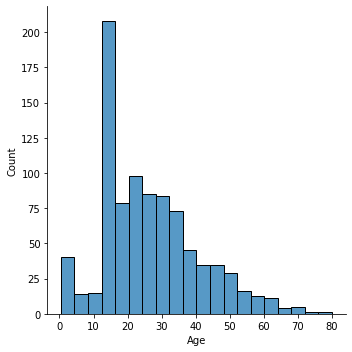

In [21]:
sns.displot(x="Age", data=df_train)

In [22]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.


In [23]:
ser1 = pd.Series(impute_age(df_train, 'Age', 'Sex', 'Embarked'), name = 'New_ages')
train_clean = pd.concat([df_train, ser1], axis = 1)
train_clean.drop(labels = ['Age', 'Ticket', 'Fare', 'Name'],axis=1, inplace = True)
train_clean.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Name_title,New_ages
0,0,3,male,1,0,S,Mr.,22.0
1,1,1,female,1,0,C,Mrs.,38.0
2,1,3,female,0,0,S,Miss.,26.0
3,1,1,female,1,0,S,Mrs.,35.0
4,0,3,male,0,0,S,Mr.,35.0


In [24]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

In [25]:
ordinal_enc = OrdinalEncoder()
labelencoder = LabelEncoder()
one_hot = OneHotEncoder()

In [26]:
train_clean["Sex"] = one_hot.fit_transform(train_clean['Sex'].values.reshape(-1,1)).toarray()

In [27]:
train_clean.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Name_title,New_ages
0,0,3,0.0,1,0,S,Mr.,22.0
1,1,1,1.0,1,0,C,Mrs.,38.0
2,1,3,1.0,0,0,S,Miss.,26.0
3,1,1,1.0,1,0,S,Mrs.,35.0
4,0,3,0.0,0,0,S,Mr.,35.0


In [28]:
train_clean["Embarked"]=labelencoder.fit_transform(train_clean['Embarked'])

In [29]:
train_clean["Name_title"]=labelencoder.fit_transform(train_clean['Name_title'])

In [30]:
train_clean.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Name_title,New_ages
0,0,3,0.0,1,0,2,2,22.0
1,1,1,1.0,1,0,0,3,38.0
2,1,3,1.0,0,0,2,1,26.0
3,1,1,1.0,1,0,2,3,35.0
4,0,3,0.0,0,0,2,2,35.0


In [31]:
train_clean['Embarked_encoded']=labelencoder.fit_transform(train_clean['Embarked'])

In [32]:
train_clean.drop(labels = "Embarked_encoded", axis = 1, inplace=True)

In [33]:
train_clean.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Name_title,New_ages
0,0,3,0.0,1,0,2,2,22.0
1,1,1,1.0,1,0,0,3,38.0
2,1,3,1.0,0,0,2,1,26.0
3,1,1,1.0,1,0,2,3,35.0
4,0,3,0.0,0,0,2,2,35.0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [35]:
y = train_clean["Survived"]
X = train_clean.drop(labels="Survived", axis = 1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [37]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred = logistic_reg.predict(X_test.values)

In [43]:
y_pred = logistic_reg.predict(X_test)
print(f"The accuracy of the model is {round(np.mean(y_pred == y_test)*100, 3)}%")

The accuracy of the model is 81.564%


In [53]:
logistic_reg.coef_

array([-0.97621546,  2.60240153, -0.27158184, -0.04539111, -0.24531245,
       -0.2079205 , -0.0149828 ])

<BarContainer object of 7 artists>

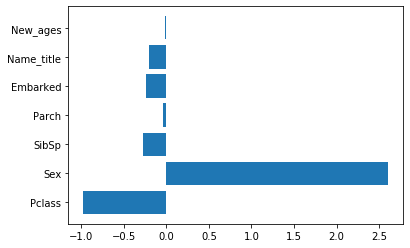

In [55]:
plt.barh(X_test.columns, logistic_reg.coef_[0])

In [56]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.8156424581005587
